In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
# 載入加州房價資料集
housing = fetch_california_housing()
print( housing['data'].shape) # 看資料形狀
print(housing['data'].ndim) # 看維度
print(housing['target'])  # 看目標值


(20640, 8)
2
[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [ ]:
import pandas as pd 
# 看到有八個特徵, 只使用前200筆資料來顯示
# 這個數據集包含：MedInc（該地區的中位數收入）、HouseAge（該地區的中位數住房年齡）、AveRooms（該地區的平均房間數目）、AveBedrms（該地區的平均臥室數目）、Population（該地區的人口數）、AveOccup（該地區的平均住房占用率）、Latitude（該地區的緯度）、Longitude（該地區的經度）共八個
display (pd.DataFrame(housing ['data'][:200],columns=housing['feature_names']  ) )
display(pd.Series(housing['target'][:200]))



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
195,1.6929,20.0,3.510355,1.152367,1659.0,2.454142,37.80,-122.26
196,1.6471,52.0,2.833333,0.927536,520.0,3.768116,37.77,-122.22
197,2.5900,52.0,4.389961,1.162162,866.0,3.343629,37.77,-122.22
198,2.5700,52.0,4.202186,1.125683,612.0,3.344262,37.77,-122.23


0      4.526
1      3.585
2      3.521
3      3.413
4      3.422
       ...  
195    1.150
196    0.950
197    0.964
198    0.720
199    0.713
Length: 200, dtype: float64

In [46]:
sample_size = 200 # 只取前200筆資料來做示範
x_full = housing.data[:sample_size]
y_full = housing.target[:sample_size] # 房價 (單位: 十萬美元)
print(x_full.shape, y_full.shape)

(200, 8) (200,)


In [47]:
# 使用**平均房間數**作為預測特徵(索引2)
feature_idx = 2
x = x_full[:,feature_idx].reshape(-1, 1) # 轉成二維陣列。若是全部特徵，則使用 x = x_full
# x = x_full[:,:] # 使用全部特徵
y = y_full * 10 # 轉換成十萬美元單位
y

array([45.26  , 35.85  , 35.21  , 34.13  , 34.22  , 26.97  , 29.92  ,
       24.14  , 22.67  , 26.11  , 28.15  , 24.18  , 21.35  , 19.13  ,
       15.92  , 14.    , 15.25  , 15.55  , 15.87  , 16.29  , 14.75  ,
       15.98  , 11.39  ,  9.97  , 13.26  , 10.75  ,  9.38  , 10.55  ,
       10.89  , 13.2   , 12.23  , 11.52  , 11.04  , 10.49  , 10.97  ,
        9.72  , 10.45  , 10.39  , 19.14  , 17.6   , 15.54  , 15.    ,
       11.88  , 18.88  , 18.44  , 18.23  , 14.25  , 13.75  , 18.75  ,
       11.25  , 17.19  ,  9.38  ,  9.75  , 10.42  ,  8.75  ,  8.31  ,
        8.75  ,  8.53  ,  8.03  ,  6.    ,  7.57  ,  7.5   ,  8.61  ,
        7.61  ,  7.35  ,  7.84  ,  8.44  ,  8.13  ,  8.5   , 12.92  ,
        8.25  ,  9.52  ,  7.5   ,  6.75  , 13.75  , 17.75  , 10.21  ,
       10.83  , 11.25  , 13.13  , 16.25  , 11.25  , 11.25  , 13.75  ,
       11.88  ,  9.82  , 11.88  , 16.25  , 13.75  , 50.0001, 16.25  ,
       13.75  , 16.25  , 18.75  , 17.92  , 13.    , 18.38  , 12.5   ,
       17.    , 19.3

In [ ]:
# 切分訓練資料與測試資料
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
#x_train: 訓練特徵資料
#x_test: 測試特徵資料
#y_train: 訓練目標資料
#y_test: 測試目標資料

x_train.shape


(160, 1)

In [49]:
# 訓練線性迴歸的模型
model = LinearRegression() # 建立模型
model.fit(x_train, y_train) # 訓練模型

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [74]:
# 預測
y_train_pred = model.predict(x_test)
#測試資料的預法  
y_test_pred = model.predict(x_test)

In [75]:
# 計算評估指標: 平均絕對誤差 (MAE)
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

r2 = r2_score(y_test, y_test_pred)
mse = mean_absolute_error(y_test, y_test_pred)
rmse=np.sqrt(mse)
print(r2,mse,rmse)
#  r2: 0.09944061876372645 ，表示模型只能解釋約9.94%的目標變異性，預測效果差



0.09944061876372645 8.021576395409307 2.8322387603112325


In [ ]:
// 生成迴歸線資料(用於繪圖)
// x.min(), x.max()
// x_line = np.linspace(X.min(),X.max(), 100).reshape(-1,1) # 產生100個點，用於繪製迴歸線
// y_line = model.predict(x_line) # 預測這些點的目標值
x_line = np.linspace(x.min(),x.max(), 100).reshape(-1,1)
y_line = model.predict(x_line)
print("ddff")

In [76]:
print("ddff")
x_line = np.linspace(x.min(),x.max(), 100).reshape(-1,1)
y_line = model.predict(x_line)
print(x_line )
print("--"*30)
print(y_line )

ddff
[[1.71428571]
 [1.78760473]
 [1.86092374]
 [1.93424276]
 [2.00756178]
 [2.08088079]
 [2.15419981]
 [2.22751882]
 [2.30083784]
 [2.37415685]
 [2.44747587]
 [2.52079488]
 [2.5941139 ]
 [2.66743291]
 [2.74075193]
 [2.81407094]
 [2.88738996]
 [2.96070897]
 [3.03402799]
 [3.107347  ]
 [3.18066602]
 [3.25398503]
 [3.32730405]
 [3.40062306]
 [3.47394208]
 [3.54726109]
 [3.62058011]
 [3.69389912]
 [3.76721814]
 [3.84053715]
 [3.91385617]
 [3.98717518]
 [4.0604942 ]
 [4.13381322]
 [4.20713223]
 [4.28045125]
 [4.35377026]
 [4.42708928]
 [4.50040829]
 [4.57372731]
 [4.64704632]
 [4.72036534]
 [4.79368435]
 [4.86700337]
 [4.94032238]
 [5.0136414 ]
 [5.08696041]
 [5.16027943]
 [5.23359844]
 [5.30691746]
 [5.38023647]
 [5.45355549]
 [5.5268745 ]
 [5.60019352]
 [5.67351253]
 [5.74683155]
 [5.82015056]
 [5.89346958]
 [5.96678859]
 [6.04010761]
 [6.11342663]
 [6.18674564]
 [6.26006466]
 [6.33338367]
 [6.40670269]
 [6.4800217 ]
 [6.55334072]
 [6.62665973]
 [6.69997875]
 [6.77329776]
 [6.84661678]
 

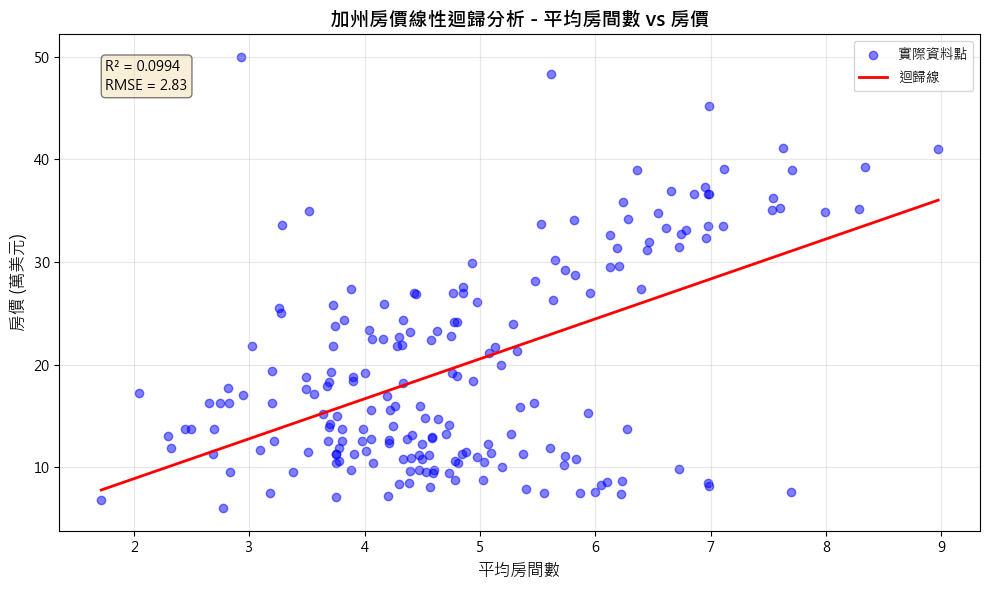

In [77]:
import matplotlib.pyplot as plt

# 設定中文字型
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # macOS
plt.rcParams['axes.unicode_minus'] = False

# 建立圖表
plt.figure(figsize=(10, 6))

# 繪製原始資料點
plt.scatter(x, y, alpha=0.5, label='實際資料點', color='blue')

# 繪製迴歸線
plt.plot(x_line, y_line, color='red', linewidth=2, label='迴歸線')

# 設定標題和標籤
plt.title('加州房價線性迴歸分析 - 平均房間數 vs 房價', fontsize=14, fontweight='bold')
plt.xlabel('平均房間數', fontsize=12)
plt.ylabel('房價 (萬美元)', fontsize=12)

# 加入網格
plt.grid(True, alpha=0.3)

# 加入圖例
plt.legend(fontsize=10)

# 顯示 R² 分數
plt.text(0.05, 0.95, f'R² = {r2:.4f}\nRMSE = {rmse:.2f}', 
         transform=plt.gca().transAxes, 
         fontsize=10, 
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

In [81]:
response = {
    "success": True,
    "data":{
        "train":{
            "x": x_train.flatten().tolist(),
            "y": y_train.tolist(),
            "y_pred": y_train_pred.tolist()
        },
        "test":{
            "x": x_test.flatten().tolist(),
            "y": y_test.tolist(),
            "y_pred": y_test_pred.tolist()
        },
        "regression_line":{
            "x": x_line.flatten().tolist(),
            "y": y_line.tolist()
        }        
    },
    "metrics":{
        "r2_score": round(r2, 4),
        "mse": round(mse, 2),
        "rmse": round(rmse, 2),
        "coefficient": round(model.coef_[0], 2),
        "intercept": round(model.intercept_, 2)
    },
    "description":{
        "dataset":"加州房價資料集",
        "samples": len(y),
        "train_size": len(y_train),
        "test_size": len(y_test),
        "feature_name": "平均房間數",
        "feature_unit": "間",
        "target_name": "房價",
        "target_unit": "萬美元",
        "info": "此資料集取自 1990 年加州人口普查資料"
    }
}

In [82]:
response

{'success': True,
 'data': {'train': {'x': [4.412903225806452,
    4.38996138996139,
    4.757281553398058,
    5.270142180094787,
    6.947890818858561,
    3.510355029585799,
    4.703225806451613,
    5.465454545454546,
    5.132246376811594,
    2.3157894736842106,
    3.822274881516588,
    3.639751552795031,
    4.761658031088083,
    6.127348643006263,
    4.040501446480231,
    1.7142857142857142,
    5.615384615384615,
    2.9456,
    3.0902394106813995,
    3.8949152542372882,
    3.882608695652174,
    3.681318681318681,
    4.882086167800454,
    5.322649572649572,
    4.6022727272727275,
    6.546391752577319,
    3.7724867724867726,
    4.528052805280528,
    2.74585635359116,
    6.657992565055762,
    4.58968058968059,
    5.735343383584589,
    4.851351351351352,
    3.7590361445783134,
    6.742627345844504,
    4.578034682080925,
    4.7280334728033475,
    7.54,
    3.7248,
    3.7270058708414875,
    8.288135593220339,
    5.830917874396135,
    3.700657894736842,
